# PROJECT-3. EDA + Feature Engineering. Соревнование на Kaggle

## КАКОЙ КЕЙС РЕШАЕМ?
Представьте, что вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

## Разбираемся с данными
В этом модуле вы будете работать с датасетом, в котором содержатся сведения о 515 000 отзывов на отели Европы. Модель должна предсказывать рейтинг отеля по данным сайта Booking на основе имеющихся в датасете данных. 

Первоначальная версия датасета содержит 17 полей со следующей информацией:

- hotel_address — адрес отеля;
- review_date — дата, когда рецензент разместил соответствующий отзыв;
- average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
- hotel_name — название отеля;
- reviewer_nationality — страна рецензента;
- negative_review — отрицательный отзыв, который рецензент дал отелю;
- review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
- positive_review — положительный отзыв, который рецензент дал отелю;
- review_total_positive_word_counts — общее количество слов в положительном отзыве.
- reviewer_score — оценка, которую рецензент поставил отелю на основе * своего опыта;
- total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
- total_number_of_reviews — общее количество действительных отзывов об отеле;
- tags — теги, которые рецензент дал отелю;
- days_since_review — количество дней между датой проверки и датой очистки;
- additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
- lat — географическая широта отеля;
- lng — географическая долгота отеля.

In [29]:
import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Для корректной работы Jupyter Notebook
%matplotlib inline
# Для корректного отображения графиков в тёмной теме
plt.style.use('default')

In [30]:
# фиксируйте RANDOM_SEED, чтобы эксперименты были воспроизводимы
RANDOM_SEED = 42

# Сбор и предварительный анализ данных 

In [31]:

train_df = pd.read_csv('data/hotels_train.csv', sep=',') # датасет для обучения
test_df  = pd.read_csv('data/hotels_test.csv', sep=',') # датасет для предсказания
submission_df = pd.read_csv('data/submission.csv', sep=',') # самбмишн

In [32]:
train_df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

Преобразуем признак review_date в формат datetime:

In [35]:
train_df.review_date = pd.to_datetime(train_df.review_date)
test_df.review_date = pd.to_datetime(test_df.review_date)

In [36]:
print(f'Сумма пустых значений широты в train: {train_df.lat.isna().sum()}')
print(f'Сумма пустых значений долготы в train: {train_df.lng.isna().sum()}')
print(f'Сумма пустых значений широты в test: {test_df.lat.isna().sum()}')
print(f'Сумма пустых значений долготы в test: {test_df.lng.isna().sum()}')

Сумма пустых значений широты в train: 2448
Сумма пустых значений долготы в train: 2448
Сумма пустых значений широты в test: 820
Сумма пустых значений долготы в test: 820


В обоих датасетах есть незаполненные координаты широты и долготы.

# Создание признаков

Создание признака города из адреса отеля: 

In [37]:
for str_ in train_df.hotel_address[:8]:
    print(str_)

Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom
130 134 Southampton Row Camden London WC1B 5AF United Kingdom
151 bis Rue de Rennes 6th arr 75006 Paris France
216 Avenue Jean Jaures 19th arr 75019 Paris France
Molenwerf 1 1014 AG Amsterdam Netherlands
Via Mecenate 121 20138 Milan Italy
97 Cromwell Road Kensington and Chelsea London SW7 4DN United Kingdom
Josefsgasse 4 6 08 Josefstadt 1080 Vienna Austria


In [38]:
countries = set()
cities = set()
for str_ in train_df.hotel_address:
    addr_ = str_.split()
    countries.add(addr_[-1])
    if addr_[-1] == 'Kingdom':
        cities.add(addr_[-5])
    else:
        cities.add(addr_[-2])
print(countries)
print(cities)

{'Kingdom', 'Netherlands', 'France', 'Spain', 'Austria', 'Italy'}
{'London', 'Barcelona', 'Milan', 'Amsterdam', 'Paris', 'Vienna'}


В обучающем и тестовом датасетах содержатся отели только из шести городов соответствующих шести стран. Это означает, что мы можем применить One-hot-кодирование к данному признаку. При отборе признаков мы удалим исходный "Hotel_address".

In [39]:
def get_city(addr_str: str) -> str:
    words_list = addr_str.split()
    if words_list[-1] == 'Kingdom':
        return words_list[-5]
    else:
        return words_list[-2]
    return 'Unknown'

# Создание временного признака города
train_df['city'] = train_df.hotel_address.apply(get_city)
test_df['city'] = test_df.hotel_address.apply(get_city)

# Заполнение нулями пустот в признаках lat и lng обоих датасетов
train_df['lat'].fillna(value=0, inplace=True)
train_df['lng'].fillna(value=0, inplace=True)
test_df['lat'].fillna(value=0, inplace=True)
test_df['lng'].fillna(value=0, inplace=True)

Заполним пустые ячейки в признаках lat и lng координатами центров соответствующих городов (из внешних источников):

In [40]:
# Координаты центров городов (lat, lng) из внешних источников
city_coords = {
    'Amsterdam': (52.383333, 4.9),
    'Barcelona': (41.383333, 2.183333),
    'London': (51.507222, -0.1275),
    'Milan': (45.466667, 9.166667),
    'Paris': (48.833333, 2.333333),
    'Vienna': (48.216667, 16.373333)
}

In [41]:
# функция для заполнения недостающих значений широты
def write_lat(city_: str, lat_: float) -> float:
    if lat_ == 0:
        return city_coords[city_][0]
    return lat_
# функция для заполнения недостающих значений долготы
def write_lng(city_: str, lng_: float) -> float:
    if lng_ == 0:
        return city_coords[city_][1]
    return lng_

In [42]:
# Заполнение недостающих значений в признаках 'lat' и 'lng'
train_df.lat = train_df[['city', 'lat']].apply(
                                               lambda x:
                                               write_lat(x.city, x.lat),
                                               axis='columns'
                                              )
train_df.lng = train_df[['city', 'lng']].apply(
                                               lambda x:
                                               write_lng(x.city, x.lng),
                                               axis='columns'
                                              )
test_df.lat = test_df[['city', 'lat']].apply(
                                             lambda x:
                                             write_lat(x.city, x.lat),
                                             axis='columns'
                                            )
test_df.lng = test_df[['city', 'lng']].apply(
                                             lambda x:
                                             write_lng(x.city, x.lng),
                                             axis='columns'
                                            )

In [43]:
# One-hot-кодирование городов
train_df = pd.get_dummies(train_df, columns=['city'])
test_df = pd.get_dummies(test_df, columns=['city'])

Извлечём из признака tags число проведённых ночей и создадим новый числовой признак "stayed_nights"

In [44]:
def get_stayed_nights(tags_str: str) -> int:
    tag_list = tags_str.lstrip('[').rstrip(']').split(', ')
    for tag in tag_list:
        tag = tag.lstrip("\' ").rstrip(" \'")
        words_list = tag.split()
        if words_list[0] == 'Stayed':
            return int(words_list[1])
    return 0

train_df['stayed_nights'] = train_df.tags.apply(get_stayed_nights)
test_df['stayed_nights'] = test_df.tags.apply(get_stayed_nights)

# Преобразование признаков

Переведём признак days_since_review в числовой:

In [45]:
for str_ in train_df.days_since_review[0:5]:
    print(str_)

531 day
203 day
289 day
681 day
516 day


In [46]:
train_df.days_since_review = train_df.days_since_review.apply(
                                lambda x: int(x.split()[0]))
test_df.days_since_review = test_df.days_since_review.apply(
                                lambda x: int(x.split()[0]))

In [47]:

train_df.review_date = pd.to_datetime(train_df.review_date)
test_df.review_date = pd.to_datetime(test_df.review_date)

# Отбор признаков

Построим матрицу корреляции:

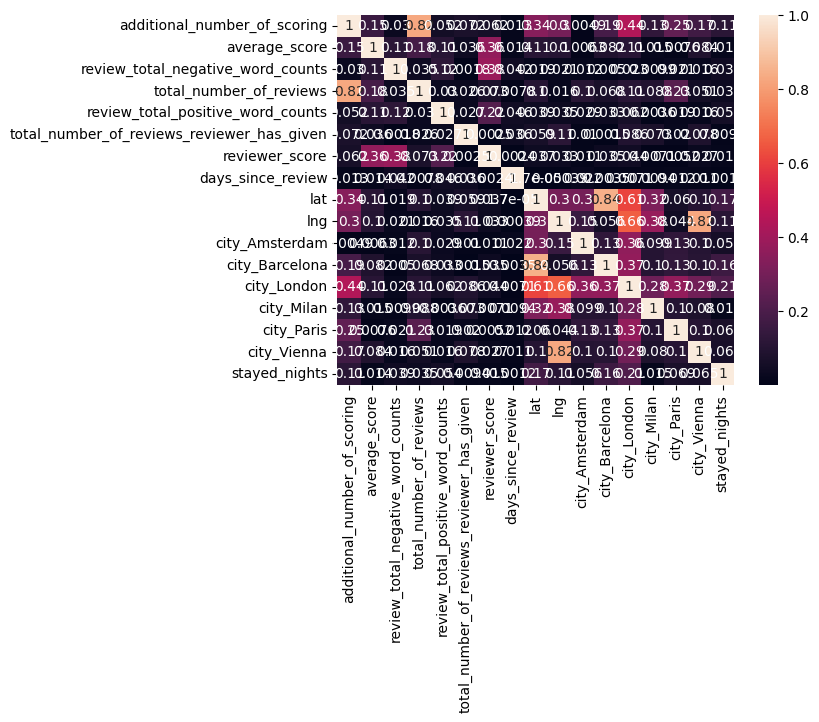

In [48]:
sns.heatmap(train_df.corr().abs(), annot=True);

Удалим незначимые признаки:

In [49]:
drop_features_list = [
    'hotel_address',
    'review_date',
    'hotel_name',
    'total_number_of_reviews',
    'reviewer_nationality',
    'negative_review',
    'positive_review',
    'tags',
    'city_Vienna',
    'city_London',
    'city_Barcelona'
]
train_df.drop(columns=drop_features_list, inplace=True)
test_df.drop(columns=drop_features_list, inplace=True)

# Обучение модели

In [50]:
X = train_df.drop(columns=['reviewer_score'])
y = train_df.reviewer_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

In [51]:
regressor = RandomForestRegressor(
                                    n_estimators=100,
                                    n_jobs=4,
                                    random_state=RANDOM_SEED
                                 )
regressor.fit(X_train, y_train)
y_predictor = regressor.predict(X_test)
print(f'MAPE:', metrics.mean_absolute_percentage_error(y_test, y_predictor))

MAPE: 0.1375323733058682


# Формирование предсказаний

In [52]:
predictions = regressor.predict(test_df)
submission_df.reviewer_score = predictions
submission_df.head()

,reviewer_score,id
0,8.497,488440
1,7.477,274649
2,8.706,374688
3,9.315,404352
4,9.800,451596
